Players_assortive_Coefficient :  -0.2756538464222314
Null_Model_assortive_Coefficient :  -0.16292692077879864


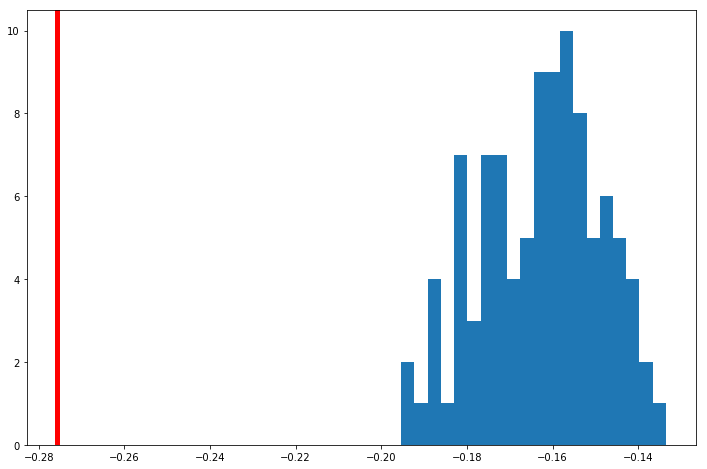

Statistical Significance Score for Comparing Players and Null Model
 -6.25223345599143


In [1]:
import networkx as nx
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
def players_graph(G):
            G=nx.Graph(G)
            return G

def assortativity(G):        
            real_assortativity = nx.degree_assortativity_coefficient(G)
            G_degree_sequence = [i[1] for i in nx.degree(G)]
            model_assortativity = []
            for i in range(100):
                    #Use the configuration model to create a null graph
                    null_graph = nx.configuration_model(G_degree_sequence) 
                    # Calculate the model's assortativity and add it to the list
                    null_graph = nx.Graph(null_graph) # removes parallel edges
                    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops
                    model_assortativity.append(nx.degree_assortativity_coefficient(null_graph))
            return real_assortativity,model_assortativity

def main():
            # Use the histogram function to plot the distribution of assortativity coefficients
            G = nx.read_pajek("players.net")
            G = players_graph(G)
            real_assortativity,model_assortativity = assortativity(G)               
            print("Players_assortive_Coefficient : ",real_assortativity)
            print("Null_Model_assortive_Coefficient : ",np.mean(model_assortativity))
            plt.figure(figsize=(12,8))
            plt.hist(model_assortativity, bins=20 ,align='mid')
            # axvline produces a vertical line at the designated x position on the graph
            plt.axvline(real_assortativity, lw=5, color="red") #lw = 2 makes the line thicker
            plt.show()
            zscores_deg = stats.zscore([real_assortativity] + model_assortativity)
            print("Statistical Significance Score for Comparing Players and Null Model\n", zscores_deg[0])
main()                                 